Loaded 48,070 AGEBs with SCI.
National mean SCI (neutral) = 40.51

PROCESSING RESOLUTION 8


Res 8:   3%|█▊                                                       | 1/32 [00:00<00:04,  6.73it/s]

→ Generated 200 unique hexes (polyfill failures: 0)



Res 8:   6%|███▌                                                     | 2/32 [00:00<00:09,  3.09it/s]

→ Generated 843 unique hexes (polyfill failures: 0)



Res 8:   9%|█████▎                                                   | 3/32 [00:00<00:07,  4.09it/s]

→ Generated 265 unique hexes (polyfill failures: 0)



Res 8:  12%|███████▏                                                 | 4/32 [00:00<00:05,  5.11it/s]

→ Generated 260 unique hexes (polyfill failures: 0)



Res 8:  16%|████████▉                                                | 5/32 [00:01<00:06,  3.87it/s]

→ Generated 825 unique hexes (polyfill failures: 0)



Res 8:  19%|██████████▋                                              | 6/32 [00:01<00:05,  4.75it/s]

→ Generated 179 unique hexes (polyfill failures: 0)



Res 8:  22%|████████████▍                                            | 7/32 [00:01<00:06,  3.59it/s]

→ Generated 1,007 unique hexes (polyfill failures: 0)



Res 8:  25%|██████████████▎                                          | 8/32 [00:02<00:07,  3.05it/s]

→ Generated 1,044 unique hexes (polyfill failures: 0)



Res 8:  28%|████████████████                                         | 9/32 [00:02<00:08,  2.58it/s]

→ Generated 869 unique hexes (polyfill failures: 0)



Res 8:  31%|█████████████████▌                                      | 10/32 [00:02<00:07,  3.04it/s]

→ Generated 347 unique hexes (polyfill failures: 0)



Res 8:  34%|███████████████████▎                                    | 11/32 [00:03<00:07,  2.64it/s]

→ Generated 900 unique hexes (polyfill failures: 0)



Res 8:  38%|█████████████████████                                   | 12/32 [00:03<00:08,  2.38it/s]

→ Generated 688 unique hexes (polyfill failures: 0)



Res 8:  41%|██████████████████████▊                                 | 13/32 [00:04<00:07,  2.47it/s]

→ Generated 865 unique hexes (polyfill failures: 0)



Polyfill res=8: 100%|█████████████████████████████████████████| 3506/3506 [00:00<00:00, 7103.92it/s]


→ Generated 1,451 unique hexes (polyfill failures: 0)


Polyfill res=8: 100%|█████████████████████████████████████████| 4009/4009 [00:00<00:00, 5074.20it/s]


→ Generated 2,814 unique hexes (polyfill failures: 0)


Res 8:  50%|████████████████████████████                            | 16/32 [00:06<00:10,  1.46it/s]

→ Generated 1,066 unique hexes (polyfill failures: 0)



Res 8:  53%|█████████████████████████████▊                          | 17/32 [00:07<00:08,  1.75it/s]

→ Generated 514 unique hexes (polyfill failures: 0)



Res 8:  56%|███████████████████████████████▌                        | 18/32 [00:07<00:06,  2.23it/s]

→ Generated 197 unique hexes (polyfill failures: 0)



Res 8:  59%|█████████████████████████████████▎                      | 19/32 [00:07<00:06,  2.13it/s]

→ Generated 1,101 unique hexes (polyfill failures: 0)



Polyfill res=8: 100%|█████████████████████████████████████████| 2067/2067 [00:00<00:00, 3466.48it/s]


→ Generated 1,657 unique hexes (polyfill failures: 0)


Polyfill res=8: 100%|█████████████████████████████████████████| 2239/2239 [00:00<00:00, 4484.56it/s]


→ Generated 1,882 unique hexes (polyfill failures: 0)


Res 8:  69%|██████████████████████████████████████▌                 | 22/32 [00:09<00:05,  1.99it/s]

→ Generated 428 unique hexes (polyfill failures: 0)



Polyfill res=8: 100%|███████████████████████████████████████████| 791/791 [00:00<00:00, 7171.49it/s]


→ Generated 395 unique hexes (polyfill failures: 0)


Res 8:  75%|██████████████████████████████████████████              | 24/32 [00:10<00:02,  2.80it/s]

→ Generated 479 unique hexes (polyfill failures: 0)



Res 8:  78%|███████████████████████████████████████████▊            | 25/32 [00:10<00:02,  3.04it/s]

→ Generated 486 unique hexes (polyfill failures: 0)



Res 8:  81%|█████████████████████████████████████████████▌          | 26/32 [00:10<00:02,  2.92it/s]

→ Generated 721 unique hexes (polyfill failures: 0)



Res 8:  84%|███████████████████████████████████████████████▎        | 27/32 [00:10<00:01,  3.45it/s]

→ Generated 462 unique hexes (polyfill failures: 0)



Res 8:  88%|█████████████████████████████████████████████████       | 28/32 [00:11<00:01,  3.06it/s]

→ Generated 915 unique hexes (polyfill failures: 0)



Res 8:  91%|██████████████████████████████████████████████████▊     | 29/32 [00:11<00:00,  3.31it/s]

→ Generated 672 unique hexes (polyfill failures: 0)



Res 8:  94%|████████████████████████████████████████████████████▌   | 30/32 [00:12<00:00,  2.40it/s]

→ Generated 1,438 unique hexes (polyfill failures: 0)



Res 8:  97%|██████████████████████████████████████████████████████▎ | 31/32 [00:12<00:00,  2.62it/s]

→ Generated 932 unique hexes (polyfill failures: 0)



Res 8: 100%|████████████████████████████████████████████████████████| 32/32 [00:12<00:00,  2.52it/s]


→ Generated 313 unique hexes (polyfill failures: 0)
Calibration → slope=1.006, intercept=-0.223, pairs=26,132
Res 8 → covered hexes: 26,132 | Mean SCI=39.28 | Time: 17.5s


/var/folders/vj/97q__v7n1rb7jd35sbnf6bch0000gn/T/ipykernel_16569/1902316988.py:269: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['SCI_ageb'], weights=g['area']))


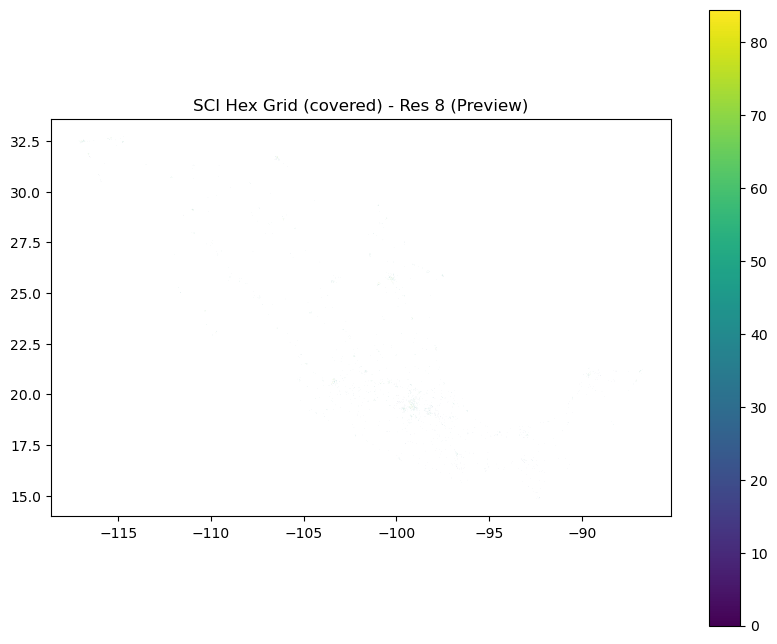

Export columns: ['hex_id', 'SCI', 'pop_est', 'geometry']
Rounding → pop_est decimals=0, geometry decimals=4
Saved: ../data/processed/hex_grids/mexico_sci_hex_res8.geojson
Saved: ../data/processed/hex_grids/mexico_sci_hex_res8.parquet

PROCESSING RESOLUTION 9


Polyfill res=9: 100%|███████████████████████████████████████████| 431/431 [00:00<00:00, 3676.68it/s]

→ Generated 1,430 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 1501/1501 [00:00<00:00, 4129.90it/s]


→ Generated 5,861 unique hexes (polyfill failures: 0)


Res 9:   9%|█████▎                                                   | 3/32 [00:01<00:11,  2.49it/s]

→ Generated 1,806 unique hexes (polyfill failures: 0)



Res 9:  12%|███████▏                                                 | 4/32 [00:01<00:08,  3.12it/s]

→ Generated 1,785 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 1514/1514 [00:00<00:00, 4434.99it/s]


→ Generated 5,857 unique hexes (polyfill failures: 0)


Res 9:  19%|██████████▋                                              | 6/32 [00:02<00:09,  2.79it/s]

→ Generated 1,155 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 1537/1537 [00:00<00:00, 4099.11it/s]


→ Generated 7,102 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 1985/1985 [00:00<00:00, 5092.12it/s]


→ Generated 7,449 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 2276/2276 [00:00<00:00, 4839.73it/s]


→ Generated 6,103 unique hexes (polyfill failures: 0)


Res 9:  31%|█████████████████▌                                      | 10/32 [00:05<00:12,  1.71it/s]

→ Generated 2,366 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 2116/2116 [00:00<00:00, 4531.56it/s]


→ Generated 6,355 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 1774/1774 [00:00<00:00, 3588.81it/s]


→ Generated 4,834 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 1210/1210 [00:00<00:00, 3586.33it/s]


→ Generated 6,169 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 3506/3506 [00:00<00:00, 5210.04it/s]


→ Generated 10,035 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 4009/4009 [00:01<00:00, 3610.14it/s]


→ Generated 19,833 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 2205/2205 [00:00<00:00, 3963.27it/s]


→ Generated 7,502 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|███████████████████████████████████████████| 861/861 [00:00<00:00, 2568.37it/s]


→ Generated 3,578 unique hexes (polyfill failures: 0)


Res 9:  56%|███████████████████████████████▌                        | 18/32 [00:13<00:11,  1.25it/s]

→ Generated 1,346 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 2156/2156 [00:00<00:00, 4402.06it/s]


→ Generated 7,532 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 2067/2067 [00:00<00:00, 2261.79it/s]


→ Generated 11,591 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 2239/2239 [00:00<00:00, 2979.84it/s]


→ Generated 13,162 unique hexes (polyfill failures: 0)


Res 9:  69%|██████████████████████████████████████▌                 | 22/32 [00:17<00:09,  1.07it/s]

→ Generated 2,992 unique hexes (polyfill failures: 0)



Res 9:  72%|████████████████████████████████████████▎               | 23/32 [00:17<00:06,  1.33it/s]

→ Generated 2,782 unique hexes (polyfill failures: 0)



Res 9:  75%|██████████████████████████████████████████              | 24/32 [00:18<00:05,  1.52it/s]

→ Generated 3,325 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 1347/1347 [00:00<00:00, 5742.52it/s]


→ Generated 3,462 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 1824/1824 [00:00<00:00, 5563.52it/s]


→ Generated 5,209 unique hexes (polyfill failures: 0)


Res 9:  84%|███████████████████████████████████████████████▎        | 27/32 [00:19<00:02,  1.89it/s]

→ Generated 3,250 unique hexes (polyfill failures: 0)



Polyfill res=9: 100%|█████████████████████████████████████████| 1885/1885 [00:00<00:00, 5282.61it/s]


→ Generated 6,432 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|███████████████████████████████████████████| 596/596 [00:00<00:00, 2854.46it/s]


→ Generated 4,728 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 2900/2900 [00:00<00:00, 4576.27it/s]


→ Generated 10,113 unique hexes (polyfill failures: 0)


Polyfill res=9: 100%|█████████████████████████████████████████| 1179/1179 [00:00<00:00, 4599.85it/s]


→ Generated 6,510 unique hexes (polyfill failures: 0)


Res 9: 100%|████████████████████████████████████████████████████████| 32/32 [00:23<00:00,  1.39it/s]


→ Generated 2,195 unique hexes (polyfill failures: 0)


/var/folders/vj/97q__v7n1rb7jd35sbnf6bch0000gn/T/ipykernel_16569/1902316988.py:269: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['SCI_ageb'], weights=g['area']))


Calibration → slope=0.992, intercept=0.316, pairs=163,932
Res 9 → covered hexes: 177,866 | Mean SCI=39.30 | Time: 41.4s


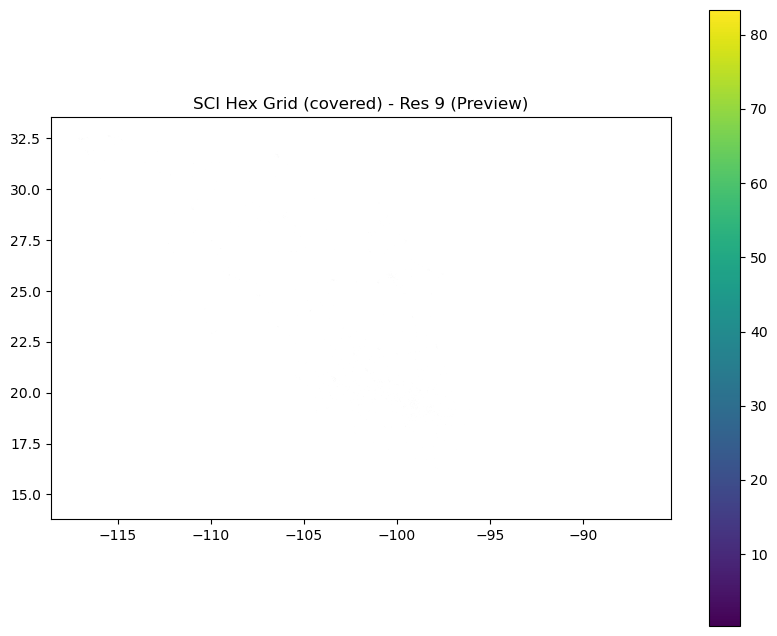

Export columns: ['hex_id', 'SCI', 'pop_est', 'geometry']
Rounding → pop_est decimals=0, geometry decimals=4
Saved: ../data/processed/hex_grids/mexico_sci_hex_res9.geojson
Saved: ../data/processed/hex_grids/mexico_sci_hex_res9.parquet
All resolutions completed.


In [117]:
import geopandas as gpd
import pandas as pd
import numpy as np
import h3
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import time

# For geometry rounding (Shapely v1/v2 safe-ish)
from shapely import wkt
from shapely.ops import transform

# ============================
# CONFIG
# ============================
geo_path = '../data/processed/indices/sci_national.parquet'
RESOLUTIONS = [8, 9]

# Quality filters
MIN_HEX_COVERAGE = 0.08      # Keep hex if >= 8% of HEX area is covered by AGEB intersections
MIN_POP_FILTER = 0           # Filter out AGEBs with POBTOT <= this (0 keeps all populated)
MIN_POP_EST = 25             # Optional: require estimated pop in hex >= this (set 0 to disable)

# Aggregation
USE_POP_WEIGHTING = True     # Recommended for SES; requires POBTOT
EA_CRS = 6933                # Equal-area CRS for weights

# Calibration
APPLY_CALIBRATION = True
CALIBRATION_SAMPLE = 300000  # Max intersection rows for calibration fitting

# Output
out_dir = Path('../data/processed/hex_grids')
out_dir.mkdir(parents=True, exist_ok=True)

EXPORT_ALL_HEXES = False        # If True, also export an 'all' layer including uncovered hexes (NaN or neutral)
FILL_UNCOVERED_FOR_UI = False   # If True and EXPORT_ALL_HEXES, fill NaN SCI with neutral mean for UI

# We only want these columns in exported render artifacts:
RENDER_COLS = ['hex_id', 'SCI', 'pop_est', 'geometry']

# Rounding for export size
POP_EST_DECIMALS = 0   # 0 => integer-ish
GEO_DECIMALS = 4       # 4 decimals ~ 11m; good for H3 res 8/9

# ============================
# HELPERS: rounding
# ============================
def round_geometry(geom, decimals=4):
    """Round geometry coordinates to reduce GeoJSON size.
    Tries WKT rounding first; falls back to coordinate transform rounding."""
    if geom is None or geom.is_empty:
        return geom

    # Fast path if WKT rounding_precision is supported
    try:
        return wkt.loads(wkt.dumps(geom, rounding_precision=decimals))
    except Exception:
        # Fallback: coordinate transform rounding
        def _r(x, y, z=None):
            return (round(x, decimals), round(y, decimals))
        try:
            return transform(_r, geom)
        except Exception:
            return geom  # last resort, no rounding

def round_render_fields(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """Round properties + geometry for export."""
    out = gdf.copy()

    # Round SCI (already 2 decimals in your pipeline, but ensure consistent)
    if 'SCI' in out.columns:
        out['SCI'] = pd.to_numeric(out['SCI'], errors='coerce').round(2)

    # Round pop_est to integer-like for compact JSON
    if 'pop_est' in out.columns:
        out['pop_est'] = pd.to_numeric(out['pop_est'], errors='coerce').fillna(0).round(POP_EST_DECIMALS)
        # If POP_EST_DECIMALS == 0, cast to int (smaller + cleaner)
        if POP_EST_DECIMALS == 0:
            out['pop_est'] = out['pop_est'].astype('int64')

    # Round geometry coords
    out['geometry'] = out['geometry'].apply(lambda g: round_geometry(g, GEO_DECIMALS))

    return out

# ============================
# LOAD
# ============================
ageb_sci = gpd.read_parquet(geo_path).copy()
ageb_sci = ageb_sci[ageb_sci.geometry.notna() & ageb_sci['SCI'].notna()].copy()

if 'POBTOT' in ageb_sci.columns:
    ageb_sci['POBTOT'] = pd.to_numeric(ageb_sci['POBTOT'], errors='coerce')
    ageb_sci = ageb_sci[ageb_sci['POBTOT'].fillna(0) > MIN_POP_FILTER].copy()
else:
    USE_POP_WEIGHTING = False  # can't pop-weight without POBTOT

ageb_sci = ageb_sci.to_crs(4326)
print(f"Loaded {len(ageb_sci):,} AGEBs with SCI.")

NEUTRAL_VALUE = float(np.nanmean(ageb_sci['SCI']))
print(f"National mean SCI (neutral) = {NEUTRAL_VALUE:.2f}")

# ============================
# H3 HELPERS (version-safe)
# ============================
def _polyfill_geom(geom, resolution):
    geo = geom.__geo_interface__
    # h3-py >= 4
    if hasattr(h3, 'geo_to_cells'):
        return set(h3.geo_to_cells(geo, resolution))
    # h3-py <= 3
    if hasattr(h3, 'polyfill'):
        return set(h3.polyfill(geo, resolution))
    # fallback
    if hasattr(h3, 'polygon_to_cells'):
        return set(h3.polygon_to_cells(geo, resolution))
    raise RuntimeError('No compatible H3 polyfill method found.')

def _cell_to_polygon(cell):
    # h3-py >= 4
    if hasattr(h3, 'cell_to_boundary'):
        coords = h3.cell_to_boundary(cell)  # (lat, lon)
        return Polygon([(lon, lat) for lat, lon in coords])
    # h3-py <= 3
    if hasattr(h3, 'h3_to_geo_boundary'):
        try:
            coords = h3.h3_to_geo_boundary(cell, geo_json=True)  # (lon, lat)
            return Polygon(coords)
        except TypeError:
            coords = h3.h3_to_geo_boundary(cell)  # (lat, lon)
            return Polygon([(lon, lat) for lat, lon in coords])
    raise RuntimeError('No compatible H3 boundary method found.')

# ============================
# GRID GENERATION
# ============================
def generate_hex_grid(gdf, resolution=8):
    hex_ids = set()
    failures = 0

    for row in tqdm(gdf.itertuples(index=False), total=len(gdf), desc=f"Polyfill res={resolution}"):
        geom = row.geometry
        if geom is None or geom.is_empty:
            continue
        if not geom.is_valid:
            geom = geom.buffer(0)
            if geom.is_empty:
                continue
        try:
            cells = _polyfill_geom(geom, resolution)
            hex_ids.update(cells)
        except Exception:
            failures += 1
            continue

    print(f"→ Generated {len(hex_ids):,} unique hexes (polyfill failures: {failures:,})")
    if not hex_ids:
        return gpd.GeoDataFrame(columns=['hex_id', 'geometry'], geometry='geometry', crs='EPSG:4326')

    polys = [_cell_to_polygon(h) for h in hex_ids]
    return gpd.GeoDataFrame({'hex_id': list(hex_ids)}, geometry=polys, crs='EPSG:4326')

# ============================
# WEIGHTED AGGREGATION
# ============================
def get_weight_sums(hex_gdf, sci_gdf, min_hex_coverage=0.12, use_pop_weighting=True, min_pop_est=0):
    """Return per-hex sums and coverage. Uses EA_CRS for areas."""

    hex_eq = hex_gdf[['hex_id', 'geometry']].to_crs(EA_CRS).copy()
    sci_eq_cols = ['SCI', 'geometry']
    if use_pop_weighting and 'POBTOT' in sci_gdf.columns:
        sci_eq_cols = ['SCI', 'POBTOT', 'geometry']
    sci_eq = sci_gdf[sci_eq_cols].to_crs(EA_CRS).copy()

    hex_eq['hex_area'] = hex_eq.geometry.area
    hex_area_map = hex_eq.set_index('hex_id')['hex_area']

    if use_pop_weighting and 'POBTOT' in sci_eq.columns:
        sci_eq['ageb_area'] = sci_eq.geometry.area
        sci_eq['pop_density'] = np.where(
            (sci_eq['ageb_area'] > 0) & sci_eq['POBTOT'].notna(),
            sci_eq['POBTOT'] / sci_eq['ageb_area'],
            np.nan
        )
    else:
        sci_eq['pop_density'] = np.nan

    inter = gpd.overlay(
        hex_eq[['hex_id', 'geometry']],
        sci_eq[['SCI', 'pop_density', 'geometry']],
        how='intersection'
    )
    if inter.empty:
        cols = ['hex_id', 'w_sci_area', 'w_area', 'hex_coverage', 'pop_est', 'w_sci_pop']
        return pd.DataFrame(columns=cols)

    inter['area'] = inter.geometry.area
    inter = inter[inter['area'] > 0].copy()

    inter['SCI_area_w'] = inter['SCI'] * inter['area']
    inter['pop_est'] = inter['pop_density'] * inter['area']
    inter.loc[~np.isfinite(inter['pop_est']), 'pop_est'] = 0.0
    inter['SCI_pop_w'] = inter['SCI'] * inter['pop_est']

    sums = inter.groupby('hex_id', as_index=False).agg(
        w_sci_area=('SCI_area_w', 'sum'),
        w_area=('area', 'sum'),
        pop_est=('pop_est', 'sum'),
        w_sci_pop=('SCI_pop_w', 'sum'),
    )
    sums['hex_area'] = sums['hex_id'].map(hex_area_map)
    sums['hex_coverage'] = np.where(sums['hex_area'] > 0, sums['w_area'] / sums['hex_area'], 0.0)

    sums = sums[sums['hex_coverage'] >= min_hex_coverage].copy()
    if min_pop_est > 0:
        sums = sums[sums['pop_est'] >= min_pop_est].copy()

    return sums[['hex_id', 'w_sci_area', 'w_area', 'hex_coverage', 'pop_est', 'w_sci_pop']]

def finalize(hex_ids, sums_df, neutral_value, fill_uncovered=False):
    """Build final hex GeoDataFrame. Uncovered => NaN SCI by default."""
    base = pd.DataFrame({'hex_id': list(hex_ids)})
    out = base.merge(sums_df, on='hex_id', how='left')

    for col in ['w_sci_area', 'w_area', 'hex_coverage', 'pop_est', 'w_sci_pop']:
        if col in out.columns:
            out[col] = out[col].fillna(0.0)

    sci_pop = np.where(out['pop_est'] > 0, out['w_sci_pop'] / out['pop_est'], np.nan)
    sci_area = np.where(out['w_area'] > 0, out['w_sci_area'] / out['w_area'], np.nan)
    out['SCI_raw'] = np.where(np.isfinite(sci_pop), sci_pop, sci_area)

    if fill_uncovered:
        out['SCI_raw'] = out['SCI_raw'].fillna(neutral_value)

    out['SCI_raw'] = out['SCI_raw'].clip(0, 100)
    out['SCI'] = out['SCI_raw'].round(2)

    hex_polys = [_cell_to_polygon(h) for h in out['hex_id']]
    return gpd.GeoDataFrame(out, geometry=hex_polys, crs='EPSG:4326')

def calibrate_hex_to_ageb(covered_hex, ageb_gdf, max_rows=300000):
    """Calibrate ONLY on covered hexes (SCI_raw is finite)."""
    covered_hex = covered_hex[covered_hex['SCI_raw'].notna()].copy()
    if covered_hex.empty:
        covered_hex['SCI_cal'] = covered_hex.get('SCI_raw', np.nan)
        return covered_hex, {'slope': 1.0, 'intercept': 0.0, 'n_pairs': 0}

    hex_eq = covered_hex[['hex_id', 'SCI_raw', 'geometry']].to_crs(EA_CRS).rename(columns={'SCI_raw': 'SCI_hex'})
    ageb_eq = ageb_gdf[['SCI', 'geometry']].to_crs(EA_CRS).rename(columns={'SCI': 'SCI_ageb'})

    inter = gpd.overlay(hex_eq, ageb_eq, how='intersection')
    if inter.empty:
        covered_hex['SCI_cal'] = covered_hex['SCI_raw']
        covered_hex['SCI'] = covered_hex['SCI_cal'].round(2)
        return covered_hex, {'slope': 1.0, 'intercept': 0.0, 'n_pairs': 0}

    inter['area'] = inter.geometry.area
    inter = inter[inter['area'] > 0].copy()
    if len(inter) > max_rows:
        inter = inter.sample(max_rows, random_state=42)

    ageb_equiv = (
        inter.groupby('hex_id')
        .apply(lambda g: np.average(g['SCI_ageb'], weights=g['area']))
        .rename('SCI_ageb_equiv')
        .reset_index()
    )

    pairs = hex_eq[['hex_id', 'SCI_hex']].merge(ageb_equiv, on='hex_id', how='inner').dropna()
    if len(pairs) < 10:
        covered_hex['SCI_cal'] = covered_hex['SCI_raw']
        covered_hex['SCI'] = covered_hex['SCI_cal'].round(2)
        return covered_hex, {'slope': 1.0, 'intercept': 0.0, 'n_pairs': int(len(pairs))}

    slope, intercept = np.polyfit(pairs['SCI_hex'], pairs['SCI_ageb_equiv'], 1)
    covered_hex['SCI_cal'] = (intercept + slope * covered_hex['SCI_raw']).clip(0, 100)
    covered_hex['SCI'] = covered_hex['SCI_cal'].round(2)

    return covered_hex, {'slope': float(slope), 'intercept': float(intercept), 'n_pairs': int(len(pairs))}

# ============================
# MAIN LOOP (state-sliced)
# ============================
for res in RESOLUTIONS:
    print(f"\n{'='*60}")
    print(f"PROCESSING RESOLUTION {res}")
    print('=' * 60)
    t0 = time.time()

    all_sums = []
    national_hex_ids = set()

    for ent in tqdm(sorted(ageb_sci['ENTIDAD'].dropna().unique()), desc=f"Res {res}"):
        state_gdf = ageb_sci[ageb_sci['ENTIDAD'] == ent].copy()
        if len(state_gdf) < 5:
            continue

        hex_gdf = generate_hex_grid(state_gdf, resolution=res)
        national_hex_ids.update(hex_gdf['hex_id'].tolist())

        sums = get_weight_sums(
            hex_gdf,
            state_gdf,
            min_hex_coverage=MIN_HEX_COVERAGE,
            use_pop_weighting=USE_POP_WEIGHTING,
            min_pop_est=MIN_POP_EST
        )
        if not sums.empty:
            all_sums.append(sums)

    if not all_sums or not national_hex_ids:
        print(f"Res {res} → No valid hexes generated.")
        continue

    national_sums = pd.concat(all_sums, ignore_index=True)

    # Collapse duplicates across states (same hex could appear on borders)
    national_sums = national_sums.groupby('hex_id', as_index=False).agg(
        w_sci_area=('w_sci_area', 'sum'),
        w_area=('w_area', 'sum'),
        pop_est=('pop_est', 'sum'),
        w_sci_pop=('w_sci_pop', 'sum'),
        hex_coverage=('hex_coverage', 'max'),
    )

    covered_hex_ids = set(national_sums['hex_id'].tolist())

    final_hex_covered = finalize(
        covered_hex_ids,
        national_sums,
        neutral_value=NEUTRAL_VALUE,
        fill_uncovered=False
    )

    if APPLY_CALIBRATION:
        final_hex_covered, cal = calibrate_hex_to_ageb(final_hex_covered, ageb_sci, CALIBRATION_SAMPLE)
        print(f"Calibration → slope={cal['slope']:.3f}, intercept={cal['intercept']:.3f}, pairs={cal['n_pairs']:,}")

    print(
        f"Res {res} → covered hexes: {len(final_hex_covered):,} | "
        f"Mean SCI={np.nanmean(final_hex_covered['SCI']):.2f} | "
        f"Time: {time.time()-t0:.1f}s"
    )

    # Preview plot (covered)
    sample = final_hex_covered.sample(min(2000, len(final_hex_covered)), random_state=42)
    sample.plot(column='SCI', legend=True, figsize=(10, 8))
    plt.title(f'SCI Hex Grid (covered) - Res {res} (Preview)')
    plt.show()

    # ----------------------------
    # EXPORT (LEAN + ROUNDED)
    # ----------------------------
    geojson_path = out_dir / f'mexico_sci_hex_res{res}.geojson'
    parquet_path = out_dir / f'mexico_sci_hex_res{res}.parquet'

    if 'pop_est' not in final_hex_covered.columns:
        final_hex_covered['pop_est'] = 0.0

    final_hex_render = final_hex_covered[RENDER_COLS].copy()
    final_hex_render = round_render_fields(final_hex_render)

    print("Export columns:", final_hex_render.columns.tolist())
    print(f"Rounding → pop_est decimals={POP_EST_DECIMALS}, geometry decimals={GEO_DECIMALS}")

    final_hex_render.to_file(geojson_path, driver='GeoJSON')
    final_hex_render.to_parquet(parquet_path, index=False)

    print(f"Saved: {geojson_path}")
    print(f"Saved: {parquet_path}")

    # Optional: export all hexes (uncovered -> NaN or neutral for UI)
    if EXPORT_ALL_HEXES:
        final_hex_all = finalize(
            national_hex_ids,
            national_sums,
            neutral_value=NEUTRAL_VALUE,
            fill_uncovered=FILL_UNCOVERED_FOR_UI
        )

        if 'pop_est' not in final_hex_all.columns:
            final_hex_all['pop_est'] = 0.0

        final_hex_all_render = final_hex_all[RENDER_COLS].copy()
        final_hex_all_render = round_render_fields(final_hex_all_render)

        geojson_path_all = out_dir / f'mexico_sci_hex_res{res}_all.geojson'
        parquet_path_all = out_dir / f'mexico_sci_hex_res{res}_all.parquet'

        final_hex_all_render.to_file(geojson_path_all, driver='GeoJSON')
        final_hex_all_render.to_parquet(parquet_path_all, index=False)

        print(f"Saved: {geojson_path_all}")
        print(f"Saved: {parquet_path_all}")

print('All resolutions completed.')
